# Capstone Project Part 5: First Test Model Pre-Tokenizing

**Authur:** Kate Meredith 

**Date:** September-November 2022

**Notebook #**: 5 of

## Background

**Source:** Data was collected from [CoffeeReview.com](https://www.coffeereview.com/) and grouped into two DataFrames for cleaning. See prior notebooks for details on scraping, cleaning and compilation.

This first test uses the numeric data that does not require tokenizing as a baseline.

In [78]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [79]:
coffee = pd.read_csv('coffee.csv')

In [80]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   coffee_name    6557 non-null   object 
 1   roaster_name   6557 non-null   object 
 2   month          6557 non-null   int64  
 3   year           6557 non-null   int64  
 4   bean_agtron    6557 non-null   int64  
 5   ground_agtron  6557 non-null   int64  
 6   aroma          6557 non-null   int64  
 7   acidity        6557 non-null   int64  
 8   body           6557 non-null   int64  
 9   flavor         6557 non-null   int64  
 10  aftertaste     6557 non-null   int64  
 11  roaster_lat    6557 non-null   float64
 12  roaster_lon    6557 non-null   float64
 13  origin_lat     6557 non-null   float64
 14  origin_lon     6557 non-null   float64
 15  p1             6557 non-null   object 
 16  p2             6557 non-null   object 
 17  p3             6557 non-null   object 
 18  overall_

In [81]:
coffee.isnull().sum()

coffee_name      0
roaster_name     0
month            0
year             0
bean_agtron      0
ground_agtron    0
aroma            0
acidity          0
body             0
flavor           0
aftertaste       0
roaster_lat      0
roaster_lon      0
origin_lat       0
origin_lon       0
p1               0
p2               0
p3               0
overall_score    0
dtype: int64

Creating numeric only df to run initial model from:

In [82]:
numeric_df = coffee.filter(['month','year','bean_agtron','ground_agtron','aroma','acidity','body','flavor','aftertaste','roaster_lat','roaster_lon','origin_lat','origin_lon','overall_score'], axis = 1)

Establishing features and target. Target is `overall_score`.

In [83]:
X = numeric_df.drop('overall_score', axis = 1)

In [84]:
X.shape

(6557, 13)

In [85]:
X.head()

,month,year,bean_agtron,ground_agtron,aroma,acidity,body,flavor,aftertaste,roaster_lat,roaster_lon,origin_lat,origin_lon
0,10,2022,60,77,9,9,9,9,8,37.973535,-122.531087,4.099917,-72.908813
1,10,2022,58,78,9,9,9,9,8,33.448437,-112.074141,-6.869970,-75.045851
2,10,2022,59,77,9,9,8,9,8,33.448437,-112.074141,4.099917,-72.908813
3,10,2022,62,78,8,8,9,9,8,37.973535,-122.531087,12.609016,-85.293691
4,10,2022,65,81,9,9,8,9,8,25.072134,121.679919,10.211670,38.652120


In [86]:
y = numeric_df['overall_score']

In [87]:
y.shape

(6557,)

In [88]:
#check out target value overview
y.describe()

count    6557.000000
mean       90.873723
std         4.089739
min        60.000000
25%        90.000000
50%        92.000000
75%        93.000000
max        98.000000
Name: overall_score, dtype: float64

Creating train, validate, test splits.

In [89]:
#create train/test split, using 20% given dataset size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
#create train/validate split, using 20% given dataset size

X_remain, X_val, y_remain, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [91]:
#checking out proportions
X_train.shape

(5245, 13)

In [92]:
X_remain.shape

(4196, 13)

In [93]:
X_test.shape

(1312, 13)

In [94]:
X_val.shape

(1049, 13)

Scaling data (not always essential for linear regression but do know data is on different scales). Making scaled data available.

In [95]:
#scaling data

scaler = StandardScaler()
scaler.fit(X_remain)
X_scaled_train = scaler.transform(X_remain)
X_scaled_val = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)

Fit first model using vanilla LinearRegression on X_train:

In [96]:
# 1. Instantiate the model
lr_model = LinearRegression()

# 2. Fit the model
lr_model.fit(X_remain, y_remain)

LinearRegression()

Evaluating training data:

In [98]:
# 3. Scoring the model
print(f'The accuracy score for training data is: {lr_model.score(X_train, y_train)}')

The accuracy score for training data is: 0.9035889713764669


Evaluating validation data:

In [99]:
# 3. Scoring the model
print(f'The accuracy score for validation data is: {lr_model.score(X_val, y_val)}')

The accuracy score for validation data is: 0.9016672631622434


Exploring correlation of variables:

In [100]:
corr_df = coffee.corr()

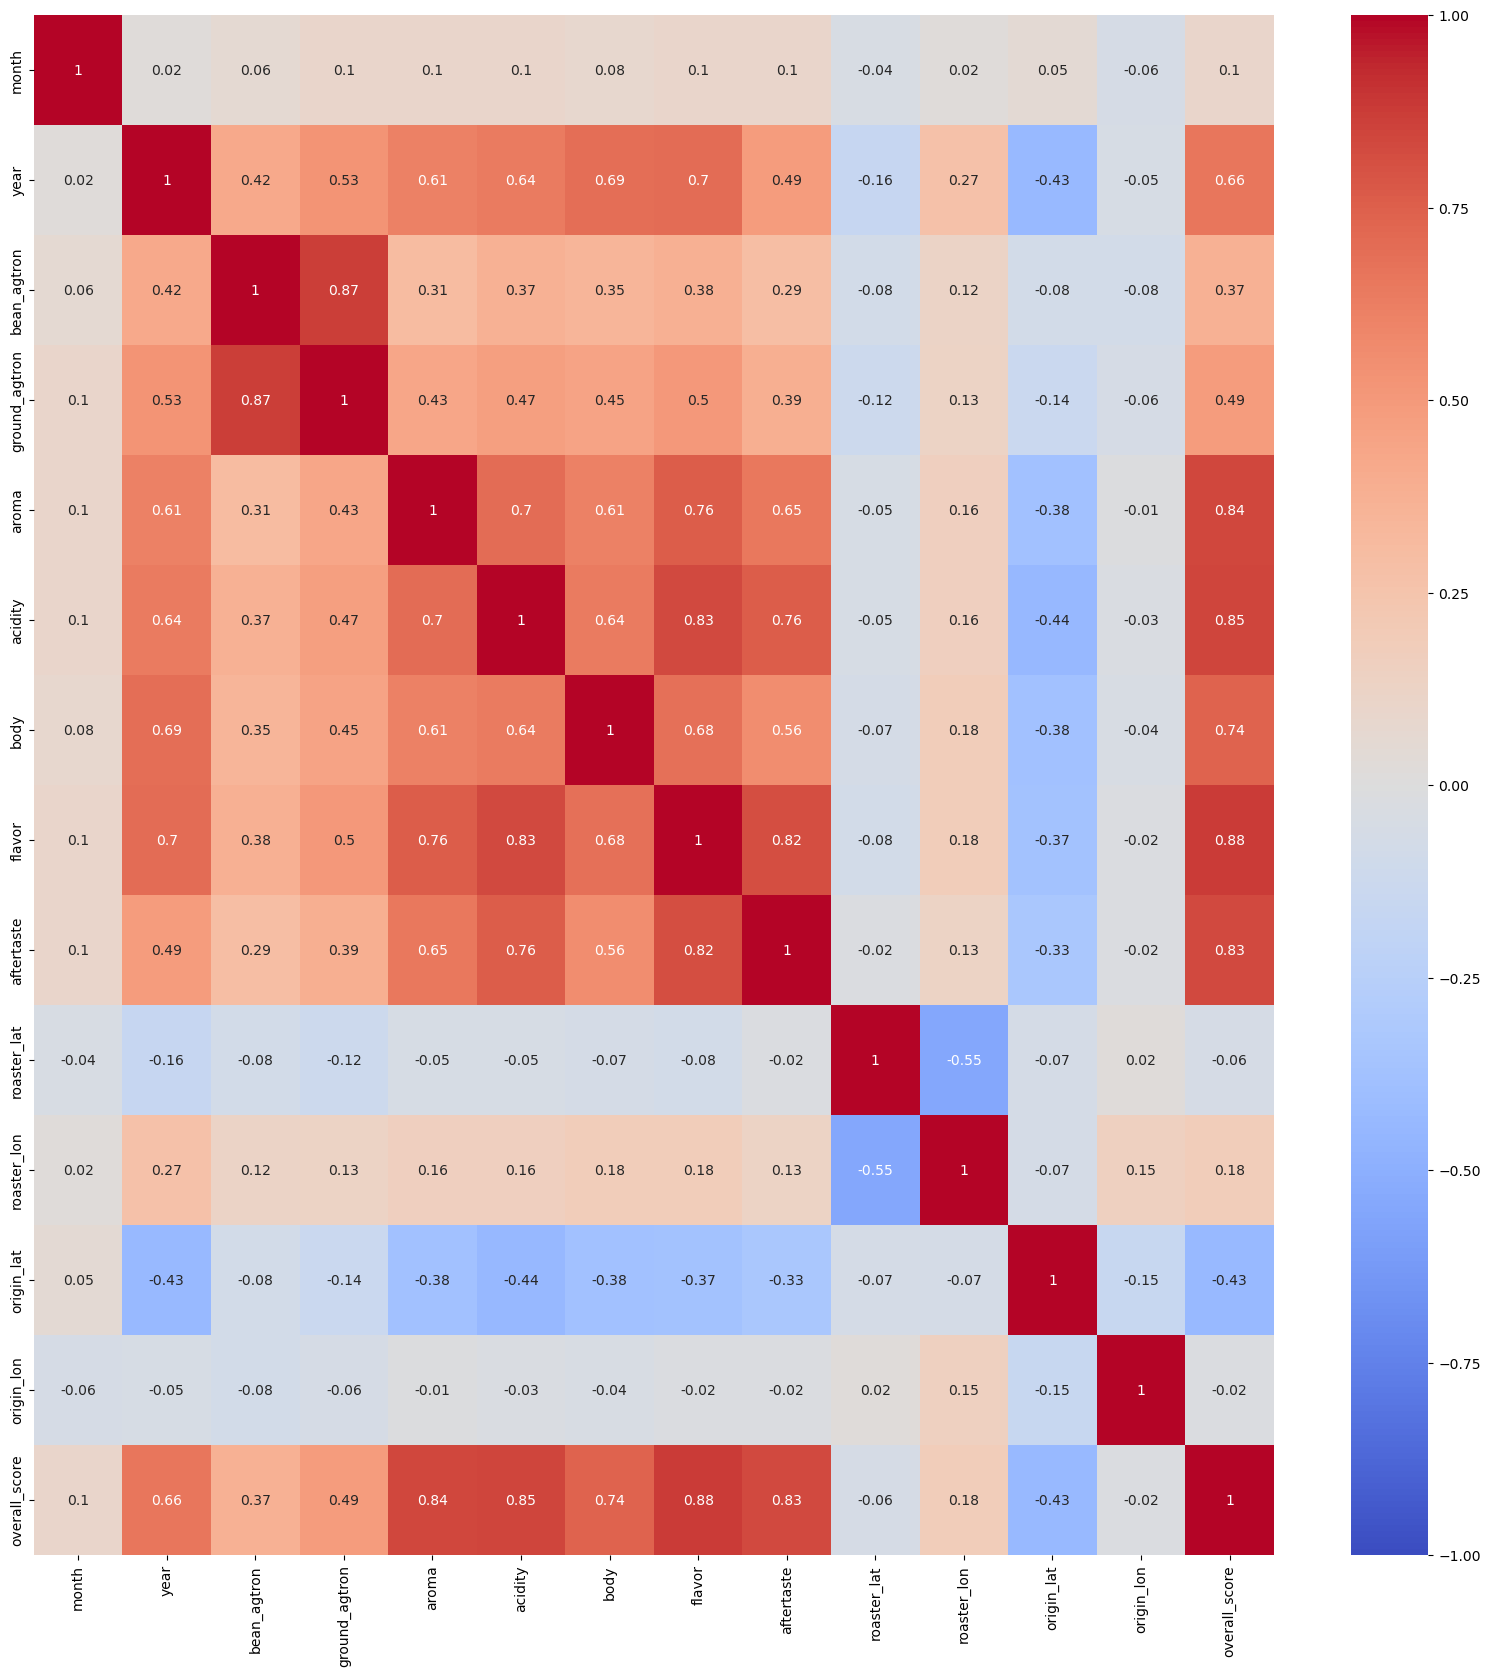

In [101]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), vmax = 1, vmin = -1, center=0, cmap="coolwarm",annot=True)
plt.show()